In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [9]:
df = pd.read_csv ('games_data.csv')
data = df.to_numpy()
X = data[:100 , [1,2,3,4,5,8,9,10,11,12,13]]
y = data[:100 , 6]

X_val = data[103:139, [1,2,3,4,5,8,9,10,11,12,13]]
y_val = data[103:139, 6]

In [10]:
for i in range(X.shape[0]):
    X[i][0] = len(X[i][0])

for i in range(X_val.shape[0]):
    X_val[i][0] = len(X_val[i][0])

In [11]:
y_encoded = [] #using Neural Networking, categorize the game to success or not. 
for i in range(y.shape[0]):
    if y[i] >= 2.5:
        y_encoded.append(1)
    else:
        y_encoded.append(0)

In [12]:
scaler = StandardScaler()
X= scaler.fit_transform(X)
X_val = scaler.transform(X_val)

In [23]:
training_model = MLPClassifier(solver='adam', alpha=0.0001, hidden_layer_sizes=(5, 2), random_state=1, max_iter=500)

In [24]:
training_model.fit(X, y_encoded)

/Users/yujunlu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=500, random_state=1)

In [25]:
y_val_encoded = [] #using Neural Networking, categorize the game to success or not. 
for i in range(y_val.shape[0]):
    if y[i] >= 2.5:
        y_val_encoded.append(1)
    else:
        y_val_encoded.append(0)
print(X_val.shape[0])

36


In [26]:
result = training_model.predict(X_val)
print(result)

[0 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0]


In [27]:
sum = 0
for i in range(X_val.shape[0]):
    if result[i] == y_val_encoded[i]:
        sum += 1
accuracy = sum/X_val.shape[0]
print(accuracy)

0.6111111111111112


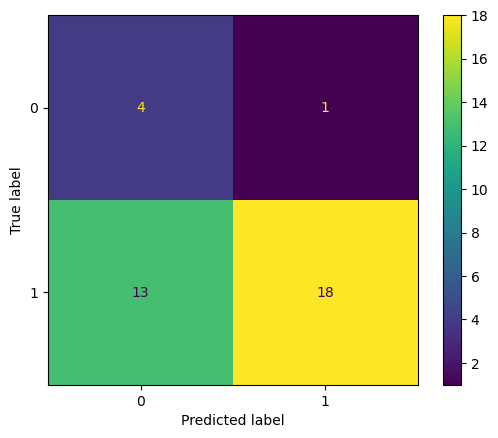

In [28]:
ConfusionMatrixDisplay.from_predictions(y_val_encoded, np.array(result))
plt.show()

/Users/yujunlu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yujunlu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yujunlu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yujunlu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yujunlu/opt/anac

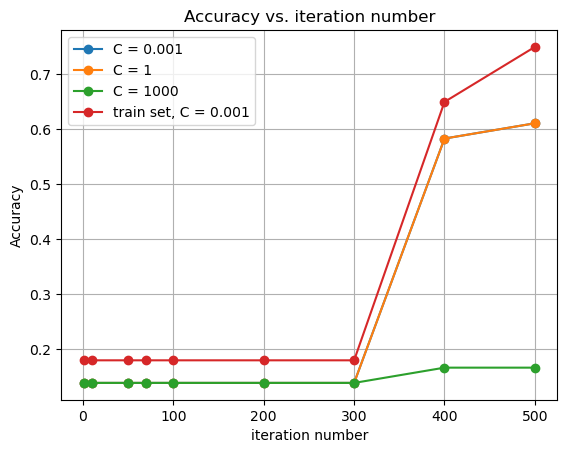

In [29]:
plot_x = []
iteration_array = [1,10, 50, 70, 100, 200, 300, 400, 500]
start_c = 0.001
start_iter = 1
for i in range(5):
    start_c *= 10
    plot_x.append(start_c)
plot_y = []
plot_val_y = []

plot_y_2 = []
plot_val_y_2 = []

plot_y_3 = []
plot_val_y_3 = []

plt.title("Accuracy vs. iteration number") 
plt.ylabel("Accuracy") 
plt.xlabel("iteration number") 

for iteration in iteration_array:
        training_model1 = MLPClassifier(solver='adam', alpha=0.0001, hidden_layer_sizes=(5, 2), random_state=1, max_iter=iteration)
        training_model2 = MLPClassifier(solver='adam', alpha=1, hidden_layer_sizes=(5, 2), random_state=1, max_iter=iteration)
        training_model3 = MLPClassifier(solver='adam', alpha=1000, hidden_layer_sizes=(5, 2), random_state=1, max_iter=iteration)
        training_model1.fit(X, y_encoded)
        training_model2.fit(X, y_encoded)
        training_model3.fit(X, y_encoded)
        
        
        score1 = training_model1.score(X,y_encoded)
        plot_y.append(score1)
        score1 = training_model1.score(X_val,y_val_encoded)
        plot_val_y.append(score1)
        
        score2 = training_model2.score(X,y_encoded)
        plot_y_2.append(score2)
        score2 = training_model2.score(X_val,y_val_encoded)
        plot_val_y_2.append(score2)
        
        score3 = training_model3.score(X,y_encoded)
        plot_y_3.append(score3)
        score3 = training_model3.score(X_val,y_val_encoded)
        plot_val_y_3.append(score3)
plt.grid()
plt.plot(iteration_array, plot_val_y,'o-', label = 'C = 0.001')
plt.plot(iteration_array, plot_val_y_2,'o-', label = 'C = 1')
plt.plot(iteration_array, plot_val_y_3, 'o-',label = 'C = 1000')
plt.plot(iteration_array, plot_y, 'o-',label = 'train set, C = 0.001')
plt.legend()

plt.show()

/Users/yujunlu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yujunlu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yujunlu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yujunlu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yujunlu/o

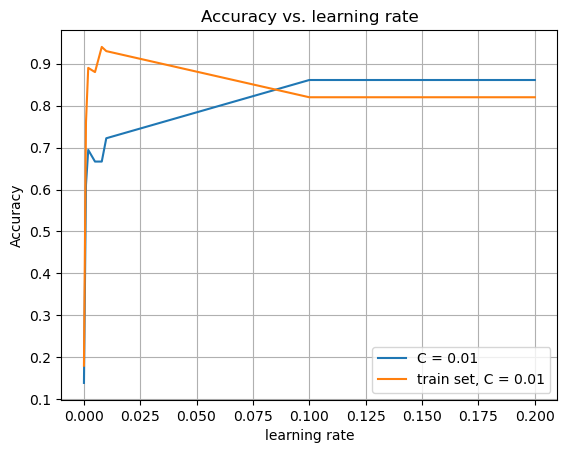

In [35]:
plot_x = []
learning_array = [0.0001,0.001,0.002, 0.005, 0.008, 0.01,0.1, 0.2]

plot_y = []
plot_val_y = []

plot_y_2 = []
plot_val_y_2 = []

plot_y_3 = []
plot_val_y_3 = []

plt.title("Accuracy vs. learning rate") 
plt.ylabel("Accuracy") 
plt.xlabel("learning rate") 

for learning in learning_array:
        training_model1 = MLPClassifier(solver='adam', alpha = 0.01, learning_rate_init=learning, hidden_layer_sizes=(5, 2), random_state=1, max_iter=iteration)
        training_model1.fit(X, y_encoded)

        
        
        score1 = training_model1.score(X,y_encoded)
        plot_y.append(score1)
        score1 = training_model1.score(X_val,y_val_encoded)
        plot_val_y.append(score1)
        
plt.grid()
plt.plot(learning_array, plot_val_y,label = 'C = 0.01')
plt.plot(learning_array, plot_y, label = 'train set, C = 0.01')
plt.legend()

plt.show()